In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix as confusion_matrix
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
plt.style.use("ggplot")
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score


import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Load the data. 
white_wine = pd.read_csv('winequality-white.csv', sep=",")
red_wine = pd.read_csv('winequality-red.csv', sep=",")

In [3]:
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_red_wine = scaler.fit_transform(red_wine)
scaled_red_wine = pd.DataFrame(scaled_red_wine, columns=red_wine.columns) 

print(scaled_red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  
0 -0.960246 -0.787823  
1 -0.584

[Text(0.5, 1.0, 'Red wine')]

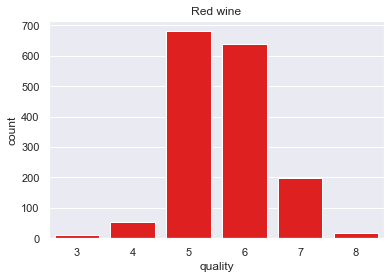

In [5]:
sns.countplot(data=red_wine, x="quality", color = 'red').set(title= "Red wine")

In [6]:
red_wine["quality"].value_counts(dropna=False, sort=True)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
red_wine["quality"].value_counts(dropna=False, sort=True, bins= 3)

(4.667, 6.333]    1319
(6.333, 8.0]       217
(2.994, 4.667]      63
Name: quality, dtype: int64

In [8]:
ratings = [
 (red_wine['quality'] >= 7),
 (red_wine['quality'] <= 4)
]
rating = ['good', 'bad']
red_wine['rating'] = np.select(ratings, rating, default='average')
red_wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [9]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,average
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,average
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,average
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,average


In [10]:
dfo=red_wine.select_dtypes(include=['object']) # select object type columns
red_wine = pd.concat([red_wine.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

def getDummyLabels(label):
    if label ==  'bad':
        return 1
    elif label ==  'average':
        return 2
    elif label ==  'good':
        return 3
    else:
        return -1

In [11]:
# We do the test train split here
X = scaled_red_wine.drop(["quality"], axis = 1)
y = red_wine['rating_good']


In [12]:
y.value_counts()

0    1382
1     217
Name: rating_good, dtype: int64

In [13]:
y.shape

(1599,)

In [14]:
y.value_counts()

0    1382
1     217
Name: rating_good, dtype: int64

# Test Train Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [16]:
from sklearn.dummy import DummyClassifier
red_dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
red_dummy_classifier.fit(X_train,y_train)
red_dummy_score = red_dummy_classifier.score(X_test,y_test)
print("Dummy Score = ", red_dummy_score)

Dummy Score =  0.8645833333333334


                         score
alcohol               0.163756
sulphates             0.125416
volatile acidity      0.104815
density               0.094444
citric acid           0.084137
total sulfur dioxide  0.080733
fixed acidity         0.077033
chlorides             0.073892
residual sugar        0.068885
pH                    0.064894
free sulfur dioxide   0.061994


Text(0.5, 1.0, 'Model Feature Importance RF for Red Wine')

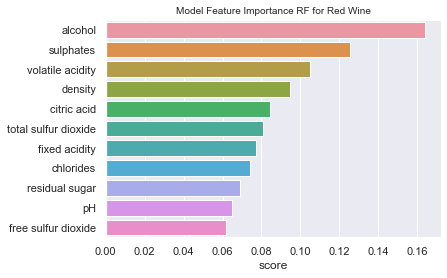

In [17]:
model_feature_importance = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score':model_feature_importance}, index=list(X.columns)).sort_values('score', ascending = False)
print(feature_scores)
sns.barplot(feature_scores['score'], feature_scores.index)
plt.title("Model Feature Importance RF for Red Wine", fontsize =10)

In [44]:
model=RandomForestClassifier()
 
model.fit(features,red_wine['rating_good'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
10,alcohol,0.157170
9,sulphates,0.120297
1,volatile acidity,0.109134
7,density,0.104342
2,citric acid,0.093622
6,total sulfur dioxide,0.080456
0,fixed acidity,0.078261
4,chlorides,0.072461
3,residual sugar,0.065614
8,pH,0.061100


In [45]:
model=RandomForestClassifier()
 
model.fit(features,red_wine['quality'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
10,alcohol,0.140963
9,sulphates,0.113322
1,volatile acidity,0.104385
6,total sulfur dioxide,0.104049
7,density,0.096191
8,pH,0.076284
0,fixed acidity,0.075874
2,citric acid,0.075774
4,chlorides,0.073680
3,residual sugar,0.072127


# Logistic Regression

In [18]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table   

,C_parameter,Accuracy
0,0.001,0.864583
1,0.010,0.8625
2,0.100,0.889583
3,1.000,0.8875
4,10.000,0.889583
5,100.000,0.889583
6,1000.000,0.889583


In [19]:
cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[399  16]
 [ 37  28]]
0.8895833333333333


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.91566265 0.85820204 0.84244671 0.91102873 0.79240037]
Mean cross validation test score: 0.8639481000926784
Mean cross validation train score: 0.858815343358301
Standard deviation in cv test scores: 0.045837506593265416


# K-NEAREST NEIGHBOR

In [21]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)
#knn_disp= plot_roc_curve(knn,X_test,y_test)

[[408   7]
 [ 39  26]]
0.9041666666666667


In [22]:
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.92215014 0.88600556 0.87673772 0.90268767 0.77479147]
Mean cross validation test score: 0.8724745134383689
Mean cross validation train score: 0.9077371682539244
Standard deviation in cv scores: 0.05123230090471566


#  RANDOM FOREST

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)
    

[[402  13]
 [ 27  38]]
0.9166666666666666


In [24]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.942076   0.89341983 0.88507878 0.8952734  0.77015755]
Mean cross validation test score: 0.8772011121408712
Mean cross validation train score: 0.9109793958024254
Standard deviation in cv scores: 0.05712930286759312


In [50]:
y_pred_train = rf.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [25]:
myLabels = [ 'Logistic Regression','KNN','Random Forest']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_rf_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_rf_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_rf]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.889583
1                  KNN              0.904167
2        Random Forest              0.916667


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.858815,0.863948
1,KNN,0.907737,0.872475
2,Random Forest,0.910979,0.877201


# HYPER PARAMETER TUNING 

In [51]:
print(rf.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [26]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)


RandomForestClassifier(criterion='entropy', n_estimators=50, n_jobs=-1,
                       random_state=1)
0.9052725647899912


In [57]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.9145833333333333
0.8799814643188137


In [35]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9279518072289157


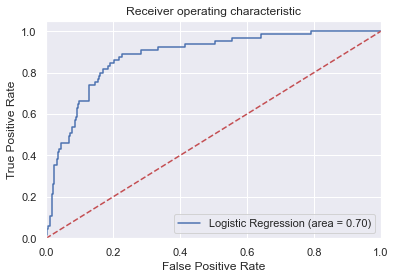

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, Logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.183231
sulphates,0.138951
volatile acidity,0.106830
density,0.089088
citric acid,0.081988


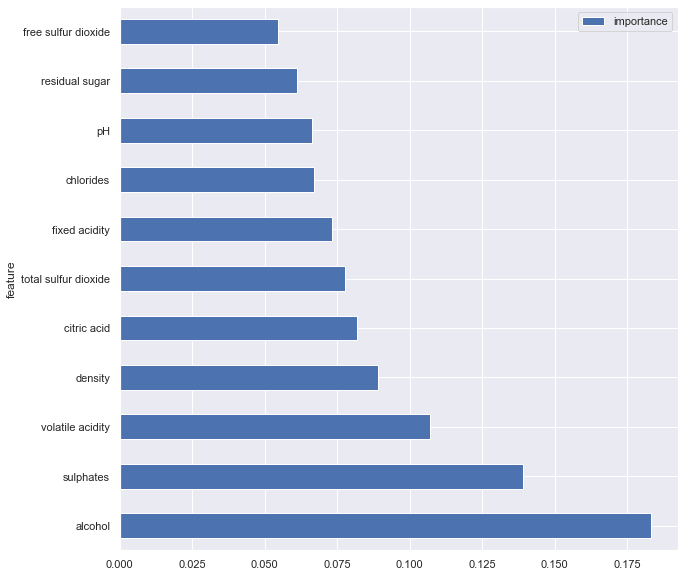

In [60]:
imp_rf.plot.barh(figsize=(10,10))
plt.show()
